In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import requests
!pip install opendatasets --quiet
import opendatasets as od 
import sys , os 
import matplotlib.pyplot as plt 
import matplotlib
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#url='https://www.kaggle.com/datasets/zohairahmed007/twitter-sentiment-analysis-dataset/download'
#od.download(url,force=True)

# 5490852669ad9c33eec8a823666c601f

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df=pd.read_csv('/content/drive/MyDrive/train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/test.csv')
original=train_df

In [5]:
train_df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
train_df = train_df.drop(['id'],axis=1)
train_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


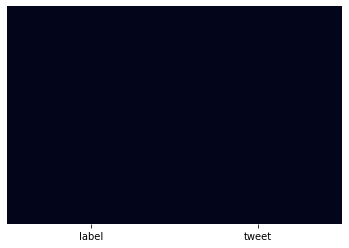

In [9]:
#Checking for null values 
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f58291350>]],
      dtype=object)

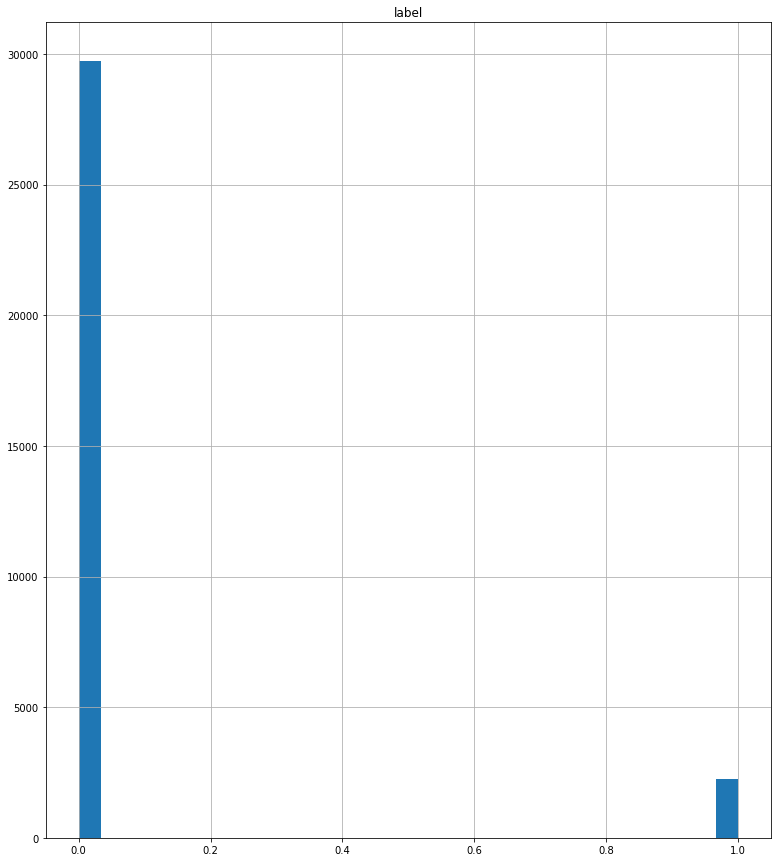

In [10]:
#Checking for no of 0 and 1 values through plot
train_df.hist(bins=30 , figsize=(13,15))

In [11]:
# Adding a length column which would be determining length of comment
train_df['length']=train_df['tweet'].apply(len)
train_df.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


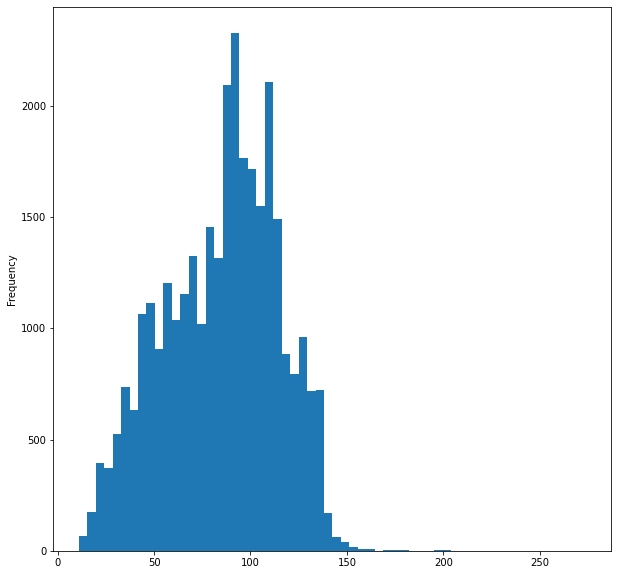

In [12]:
#Plotting for length data
train_df['length'].plot(bins=60, figsize=(10,10), kind = 'hist')

In [13]:
train_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [14]:
#Lets divide it into positive and negative 
#where 0 is positive and 1 is negative

In [15]:
positive = train_df[train_df['label']==0]
negative = train_df[train_df['label']==1]

In [16]:
positive.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


In [17]:
negative.tail(10)

,label,tweet,length
31912,1,i couldn't end #2016 without mentioning #trump...,86
31926,1,a follow up from the gentlemen who were kicked...,99
31929,1,did keep #colinpowell and #condoleezzarice fr...,117
31930,1,@user #feminismiscancer #feminismisterrorism #...,97
31933,1,@user judd is a &amp; #homophobic #freemilo #...,108
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [18]:
print(positive.shape)
print(negative.shape)

(29720, 3)
(2242, 3)


In [19]:
!pip install wordcloud --quiet
from wordcloud import WordCloud

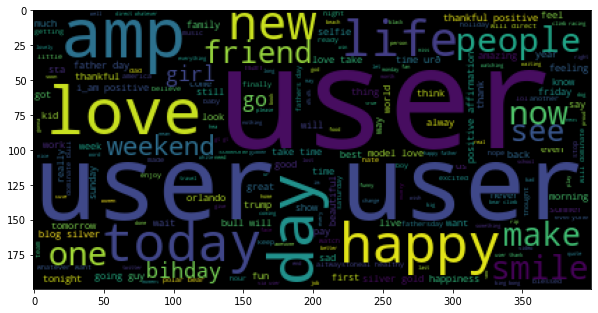

In [20]:
#Visual representation of training dataset 
#All weighted words except most common like a an the etc
comment = train_df['tweet'].tolist()
comment_as_a_string = ''.join(comment)
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(comment_as_a_string))

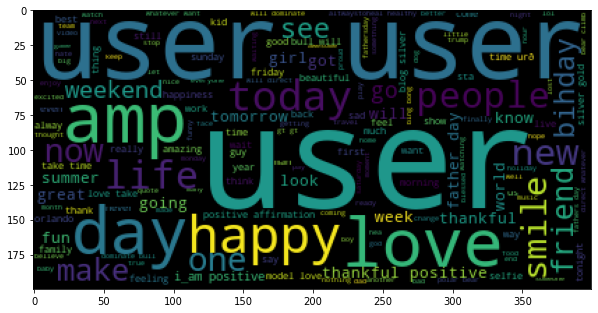

In [21]:
positive_comment = positive['tweet'].tolist()
positive_comment_as_a_string = ''.join(positive_comment)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_comment_as_a_string))

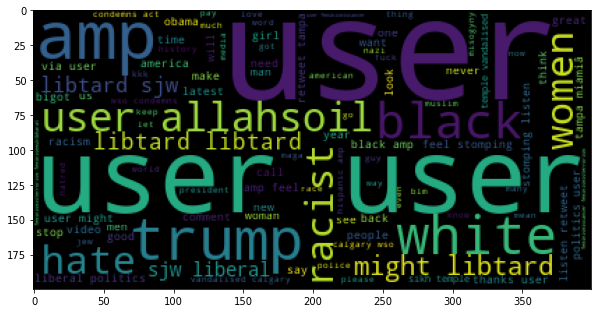

In [22]:
negative_comment = negative['tweet'].tolist()
negative_comment_as_a_string = ''.join(negative_comment)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_comment_as_a_string))

In [23]:
#removing punctuations 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Data Cleaning Removing STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

In [25]:
#lets take a example that how does it works.
random_text='Its my goal to establish a fin-tech comapny........:) Hope I would be doing soon ......!!!!'


In [26]:
#A pipeline to remove punctuations and stopwords
text_punc= [char for char in random_text if char not in string.punctuation]
text_punc_cleared = ''.join(text_punc)
print(f'Original => {random_text}')
print(f'After clearing \n{text_punc_cleared}')
text_clean_stopwords = [word for word in text_punc_cleared.split() if word.lower() not in stopwords.words('english')]
text_clean_stopwords

Original => Its my goal to establish a fin-tech comapny........:) Hope I would be doing soon ......!!!!
After clearing 
Its my goal to establish a fintech comapny Hope I would be doing soon 


['goal', 'establish', 'fintech', 'comapny', 'Hope', 'would', 'soon']

In [27]:
#Tokenization
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
#Task will be to create a pipeline for removing punctuations Stopwords and perfoem tokenization

In [29]:
def clear(message):
    tweet_text = [char for char in message if char not in string.punctuation]
    tweet_text_join = ''.join(tweet_text)
    clean = [word for word in tweet_text_join.split() if word.lower() not in stopwords.words('english')]
    return clean

In [30]:
train_clean_df=train_df['tweet'].apply(clear)

In [31]:
print(train_df['tweet'][1])
print(train_clean_df[1])

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
['user', 'user', 'thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked']


In [33]:
vectorizer = CountVectorizer(analyzer = clear)
#tweets_vectorizer = CountVectorizer(analyzer = clear, dtype = 'uint8').fit_transform(train_df['tweet']).toarray()
tweets_vectorizer = vectorizer.fit_transform(train_df['tweet'])


In [34]:
tweets_vectorizer.shape

(31962, 47386)

In [35]:
x = tweets_vectorizer
y = train_df['label']

In [36]:
x.shape, y.shape

((31962, 47386), (31962,))

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [38]:
x_train.shape, y_train.shape

((25569, 47386), (25569,))

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
NB_classifier = MultinomialNB()

In [41]:
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [42]:
#Performance
from sklearn.metrics import classification_report, confusion_matrix

(2.5, -0.5)

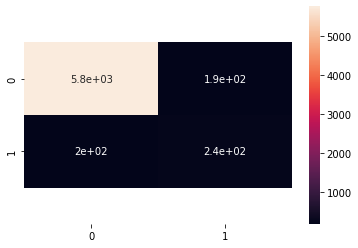

In [43]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
ax = sns.heatmap(cm, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5954
           1       0.56      0.55      0.55       439

    accuracy                           0.94      6393
   macro avg       0.76      0.76      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [45]:
#Upsampling
tweets_df_ex1 =original
tweets_df_ex1.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [46]:
tweets_df_ex1.shape

(31962, 3)

In [47]:
tweets_df_ex1 = tweets_df_ex1.drop(['id'], axis = 1)
tweets_df_ex1.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [49]:
positive_1 = tweets_df_ex1[tweets_df_ex1['label']==0]
negative_1 = tweets_df_ex1[tweets_df_ex1['label']==1]

In [50]:
from sklearn.utils import resample
neg_upsample = resample(negative_1,replace=True,n_samples=len(positive_1),random_state=42)

In [52]:
positive_1.shape, neg_upsample.shape

((29720, 2), (29720, 2))

In [53]:
dataframes = [positive,neg_upsample]
tweets_df_upsample = pd.concat(dataframes, sort = True)

In [54]:
tweets_df_upsample.shape

(59440, 3)

In [55]:
tweets_df_upsample['length']=tweets_df_upsample['tweet'].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f51249050>,
      dtype=object)

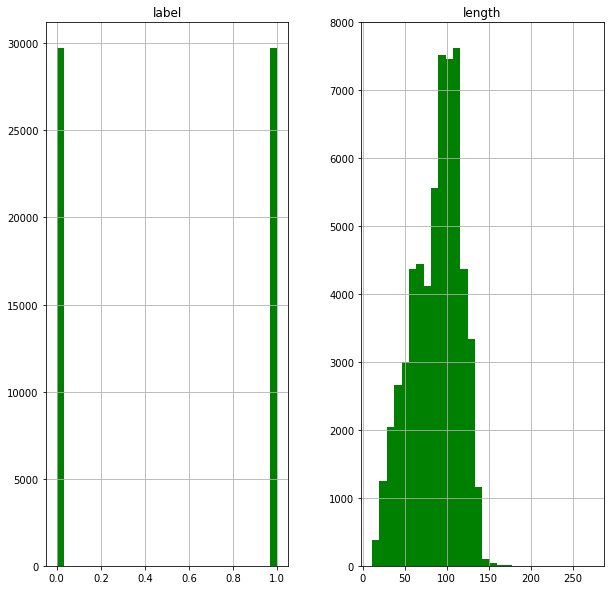

In [56]:
tweets_df_upsample.hist(bins=30, figsize = (10,10), color = 'g')


In [57]:
#Pipeline to remove Punctuations , stopwords and performing tokenization 

In [58]:
def clean1(message):
    tweet_text = [char for char in message if char not in string.punctuation]
    tweet_text_join = ''.join(tweet_text)
    tweet_text_join_clean = [word for word in tweet_text_join.split() if word.lower() not in stopwords.words('english')]
    return tweet_text_join_clean

In [61]:
tweets_df_clean_upsample = tweets_df_upsample['tweet'].apply(clean1)

In [63]:
print(tweets_df_clean_upsample[1])
print(tweets_df_upsample['tweet'][1])

['user', 'user', 'thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked']
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


In [64]:
vectorizer = CountVectorizer(analyzer = clean1)


In [65]:
tweets_vectorizer_upsample = vectorizer.fit_transform(tweets_df_upsample['tweet'])

In [66]:
tweets_vectorizer_upsample

<59440x47386 sparse matrix of type '<class 'numpy.int64'>'
	with 505518 stored elements in Compressed Sparse Row format>

In [67]:
x = tweets_vectorizer_upsample
y = tweets_df_upsample['label']

In [68]:
x.shape, y.shape


((59440, 47386), (59440,))

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [70]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

(2.5, -0.5)

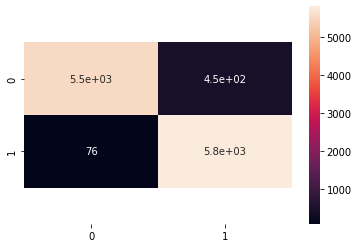

In [71]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
ax = sns.heatmap(cm, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [72]:
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.99      0.93      0.95      5989
           1       0.93      0.99      0.96      5899

    accuracy                           0.96     11888
   macro avg       0.96      0.96      0.96     11888
weighted avg       0.96      0.96      0.96     11888

